# Análise de Dados de Inadimplência - Leone Lúcio

# EDA - Análise de Dados Exploratória - Dados de Crédito Stone 

Recebi um banco de dados de crédito referente uma empresa, a partir da EBAC. Minha missão é ajudar essa empresa de concessão de crédito a analisar o seu histórico de clientes para identificar o perfil de clientes inadimplentes e criar possíveis estratégias para evitar a inadimplência e até mesmo ajudar os clientes a saírem da inadimplência.

Os passos que segui para isso estão descritos anteriormente, com algumas explicações sempre após os blocos de código. Pense nessas explicações como "legendas".

A seguir, darei uma visão geral do que foi feito em cada etapa:

- Importando bibliotecas: Trouxemos para nosso ambiente as bibliotecas que usaremos
- Explorando os Dados: Verificamos a estrtura dos dados, definimos (e explicamos o que é) o *schema* dos dados e qual era a situação dos dados faltantes.
- Limpeza e Transformação: Aqui nós tratamos os dados e decidimos o que fazer com os dados faltantes, deixando nosso DataSet limpo e pronto para análise.
- Visualização dos Dados: Aqui nós usamos uma das bibliotecas importadas para visualizar os dados em gráficos, assim como cruzarmos informações para verificarmos nossos insigths.

## Importando Bibliotecas

In [1]:
import pandas as pd #importando a biblioteca Pandas
import seaborn as sns #importando a biblioteca Seaborn
import matplotlib.pyplot as plt #importando a biblioteca Matplolib

## Explorando os Dados
Abaixo começaremos a exploração dos dados. Como estamos em terras desconhecidas teremos que conferir se todas as colunas estão completas, se os dados estão descritos corretamente e se as chaves de identificação são únicas, afim de garantir de podemos confiar nestas informações. E caso não possamos confiar? Isso é esperado, e neste caso usaremos técnicas para tornar as informações tão verdadeiras quanto possível.

Você pode conferir os blocos de código com comentários explicativos e após alguns blocos de código também haverá comentários a respeito do raciocínio utilizado na forma de blocos de texto que explicam o que está sendo feito no código.

In [21]:
df = pd.read_csv('credito.csv', na_values='na') #Criamos um dataframe para leitura do arquivo CSV e definimos os valores vazios como 'na'
df.head(n=5) #Exibindo as 5 primeiras linhas da nossa tabela

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### Dicionário de Variáveis

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


Começamos importando a biblioteca Pandas, em seguida criamos um dataframe para ler o arquivo CSV e definimos os dados faltantes como "na". Isso informará ao Pandas como ele deve chamar esses dados vazios. Por fim, exibimos as 5 primeiras linhas da tabela.

Na tabela podemos ver os dados gerais dos clientes. A maioria deles são autoexplicativos (idade, sexo, dependentes, etc). Porém, vamos explicar a coluna *default* e a coluna *id*.

>*default* = é nossa coluna de interesse e indica se o cliente é **adimplente (0) ou inadimplente (1)**. Em geral, utilizamos o nome *default* para nos referir a informação que desejamos descobrir.

>*id* = se refere a identificação cada cliente. Você pode pensar no *id* como um "nome" em forma de número, de modo que nenhum nome se repita na tabela. Ela é importante por ser um identificador único para cada cliente. É o que chamamos de chave primária.

Agora vamos verificar a estrutura dos dados, o schema e os dados faltantes. Vamos lá?





### Estrutura

In [22]:
df.shape #Verificando a quantidade de linhas, colunas (tupla)

(10127, 16)

In [23]:
df[df['default']==0].shape #Verificando a quantidade de clientes adimplentes

(8500, 16)

In [24]:
df[df['default']==1].shape #Verificando a quantidade de clientes inadimplentes

(1627, 16)

In [25]:
# Porcentagem de clientes adimplentes
porcentagem_adimplentes = (8500 / 10127) * 100

# Porcentagem de clientes inadimplentes
porcentagem_inadimplentes = (1627 / 10127) * 100

# Exibindo os resultados
print(f'Porcentagem de clientes adimplentes: {porcentagem_adimplentes:.2f}%')
print(f'Porcentagem de clientes inadimplentes: {porcentagem_inadimplentes:.2f}%')

Porcentagem de clientes adimplentes: 83.93%
Porcentagem de clientes inadimplentes: 16.07%


Aqui usamos método *shape* para termos uma visão ampla dos dados, com a quantidade de linhas e colunas (isso é o que chamamos de tupla). Em seguida usamos o mesmo método afim de descobrirmos as quantidade de clientes adimplentes (*default 0)* e inadimplentes (*default 1*). Note que ao somarmos a quantidade de linhas da tupla de clientes adimplente e inadimplentes, obtemos o valor total. Isso indica que o código está correto e **não há dados faltantes na coluna de interesse (default)**. 

Também calculamos a porcentagem de clientes adimplentes e inadimplenstes, afim de verificar a saúde financeira da crediária, que parece saudável. Nosso objetivo será melhorar ainda mais. 

### Schema

Aqui vamos verificar o "schema" dos dados. Isso é, se cada dado está em um tipo condizente com sua informação para a leitura no Pandas. Geralmente: números inteiros devem estar no formato *int*, números decimas em *float*, textos em *object*. Também é importante verificar além do formato, se os dados estão consistentes. Isso é, se todas as colunas possuem informações ou se há espaços vazios ou mesmo preenchidos errados.

In [26]:
df.dtypes #Verificando o tipo de dado de cada coluna

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [27]:
df.select_dtypes('object').describe().transpose() #verificando os atributos categóricos

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [28]:
df.select_dtypes('number').describe().transpose() #verificando os atributos númericos

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
default,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
idade,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,6.485869e+01,2.347257e+01,10.0,45.0,67.0,81.0,139.0


Com essas linhas de código podemos visualizar os atributos catégoricos e númericos separados em tabelas distintas. Antes de falarmos das tabelas, uma breve observação sobre ***o que são atributos categóricos e atributos númericos***:

> Atributos Categóricos: Atributos catégoricos são aqueles que se referem a características descritivas (ou qualitativas) dos dados. Por exemplo, sexo, escolaridade ou estado civil são descrições daquele cliente.

> Atributos Númericos: Atributos númericos são aqueles que se referem a características quantitativas dos dados. Por exemplo, idade e número de dependentes.

Agora que temos uma noção do conceito de atributos categóricos e numéricos, podemos notar que a maioria dos dados está em formato condizente. Porém, vamos nos atentar a algumas conclusões:

*   Embora seja claro para nós que os dados *valor_transações_12m e limite_credito* se tratam de números decimais, o Pandas não os lê dessa maneira. Isso porquê eles não seguem o padrão norte-americano para números. Teremos que corrigir isso na próxima etapa

*   Podemos notar também que os dados *escolaridade, estado_civil, salario_anual* não possuem a mesma quantidade de linhas que o dataframe completo, ou seja, temos alguns dados faltantes. Teremos que corrigir isso na próxima etapa.

* Além disso, note que o Id é lido como atributo numérico. Embora, a primeira vista possa parecer correto, o Id é um número descritivo que substitui o nome dos clientes em prol da sua privacidade. Então, podemos pensar nele como um atributo categórico, embora o Panda o leia como númerico já que são números. Porém, como não pretendemos operar estes dados, não me parece necessário essa correção.




### Dados Faltantes

Sabemos que dados faltantes podem ser quaisquer dados que não estão disponíveis para nós por qualquer razão que seja: preenchido de maneira errada, por estarem realmente vazios, incorretos, etc. Neste DataSet os dados faltantes são descritos como "na", e como já informamos isso ao Pandas na hora de importar o DataSet, podemos verificar algumas informações a respeito destes dados faltantes.

Também vimos na etapa anterior que as colunas *escolaridade, estado_civil, salario_anual* possuem dados faltantes. Também podemos usar o Python para confirmamos essa informação e até verificar se há mais alguma coluna com dados faltantes. Veja:

In [29]:
df.isna().any() #verificando se há colunas com dados faltantes (retorno = True)

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [30]:
def stats_dados_faltantes(df: pd.DataFrame) -> None: #definindo função para verificarmos estatisticas dos dados faltantes

  stats_dados_faltantes = [] #criando uma lista com informações dos dados faltantes
  for col in df.columns: #chama cada coluna do dataframe para analise
    if df[col].isna().any(): #se a coluna em analise possuir dados vazios (retorno = True), executa os códigos abaixo
      qtd, _ = df[df[col].isna()].shape #define a variavel qtd que é igual a quantidade de dados vazios dentro da coluna
      total, _ = df.shape #define a variavel total que é igual a quantidade de linhas dos dataframe
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}} #cria dicionarios da coluna com quantidade de dados faltantes e sua porcentagem salvas
      stats_dados_faltantes.append(dict_dados_faltantes) #adiciona os dicionarios criados na lista criada inicialmente

  for stat in stats_dados_faltantes:
    print(stat)

Acima utilizamos uma função para analisar cada coluna e se esta coluna possuir dados faltantes, ela salva o nome da coluna, a quantidade de dados faltantes e a porcentagem destes dados em uma lista. Com estas informações salvas podemos comparar a proporção de dados faltantes entre clientes **adimplente (0) ou inadimplente (1)**

In [31]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [32]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [33]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Aqui nós verificamos a proporção de dados vazios entre os clientes **adimplentes (0) ou inadimplentes (1)** percebemos que, proporcionalmente, a diferença é minima em todas as colunas.

## Limpeza e Transformação de Dados


Agora que temos uma visão geral dos nossos dados, o próximo passo é fazer a limpeza e transformação destes dados, para então visualizá-los. Assim, os próximos passos serão:

*   Corrigir o *schema* das colunas
*   Remover dados faltantes. Note que optamos por remover os dados faltantes porque a diferença entre a quantidade de dados faltantes nos adimplentes e inadimplentes é mínima, assim, não causará uma grande repercussão na nossa base de dados.



### Correção de Schema


Na etapa de exploração de dados vimos que as colunas *valor_transações_12m e limite_credito* não eram lidas como números e sim como *objects* por terem sido escritos no padrão brasileiro.

Para que o Python os leia como números, vamos corrigir a maneira como foram escritos, substituindo a vírgula por ponto e excluindo o ponto que separa a casa do milhar das centenas.

Faremos isso usando uma função `lambda`.

In [34]:
corrigir_schema = lambda valor: float(valor.replace(".", "").replace(",", ".")) #definindo a variável cs (correção_schema) que é igual a função lambda

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22'] #criando um grupo de números para testar a função lambda antes de aplicar
valores_limpos = list(map(corrigir_schema, valores_originais)) #usando a função map para aplicar a função lambda a todos os elementos no grupo de números que criamos antes

print(valores_originais)
print(valores_limpos) #Podemos visualizar o resultado e nossa função lambda está funcionando corretamente

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [35]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(corrigir_schema) #chamamos a coluna que desejamos do dataframe e definimos que ela é igual a mesma coluna após aplicar a função lambda criada
df['limite_credito'] = df['limite_credito'].apply(corrigir_schema)

Criamos uma função `lambda` para um valor `float`(decimal) e usamos o método `replace`para trocar os pontos por 'nada' e trocar as vírgulas por ponto. Em seguida, testamos essa função em um grupo de números para termos certeza de que ela está correta.

Sabendo que a função `lambda`está correta, nós a aplicamos nas colunas *valor_transações_12m e limite_credito*. Uma vez que os dados estejam escritos no formato correto, o Python deverá lê-los como números. Vamos conferir:

In [36]:
df.dtypes #verificando o tipo de todas as colunas

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [37]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #verificando as colunas númericas, exceto o id

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Usando o método `dtypes`verificamos que agora estas colunas estão sendo lidas como `float64`. Como `float`é o tipo esperado para números decimaois, isso está correto.

Em seguida verificamos as colunas que são interpretadas como númericas, exceto o *id* já que ele não nos interessa aqui, apenas para fins de confirmação. Como esperado, agora as colunas *valor_transações_12m e limite_credito* estão presentes e podemos ver algumas informações dela.

### Removendo Dados Faltantes

Verificamos também na etapa de exploração de dados que algumas colunas possuíam dados faltantes. Ao analisarmos a proporção destes dados faltantes para clientes **adimplentes (0) ou inadimplentes (1)** vimos que ela é praticamente semelhante em ambos os grupos.

Por isso, chegamos a conclusão que podemos excluir as linhas com dados faltantes sem desbalancear nossos dados. Como o Pandas já sabe como ler os dados faltantes, excluir suas linhas será um problema simples.

In [38]:
df.dropna(inplace=True) #excluindo todas as linhas que possuam dados vazios (na)

In [39]:
df.shape #verificando novamente a tupla para confirmar a exclusão dos dados

(7081, 16)

In [42]:
qtd_total_novo, _ = df.shape #definindo variavel para a nova quantidade total de linhas
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape #definindo variavel para a nova quantidade total de linhas adimplentes
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape #definindo variavel para a nova quantidade total de linhas inadimplentes

print(f"A proporcão dos adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%") #verificando a nova proporção de clientes adimplentes e inadimplentes

A proporcão dos adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão de clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Após excluirmos os dados faltantes da nossa base de dados, verificamos novamente a proporção entre inadimplentes e adimplentes e vimos que sua variação foi mínima. Agora, podemos seguir para a próxima etapa onde iremos visualizar os dados.

## Visualização de Dados




Agora que nosso DataSet está limpo, vamos gerar visualizações dos dados buscando correlacionar a coluna de interesse *default* com as demais colunas.

In [41]:
sns.set_style("whitegrid") #definindo o estilo de gráfico que usaremos no Seaborn
df_adimplente = df[df['default'] == 0] #criando grupo de clientes adimplentes
df_inadimplente = df[df['default'] == 1] #criando grupo de clientes inadimplentes

Definimos o estilo dos gráfico que queremos gerar com a biblioteca do Seaborn. Em seguida criamos uma variável para o grupo de clientes adimplentes e uma para os inadimplentes.

Com os clientes dividos nestes 2 grupos de interesse, podemos começar a buscar relações da coluna de interesse *default* com as demais colunas.

### Visualizando Variáveis Categóricas

* Escolaridade

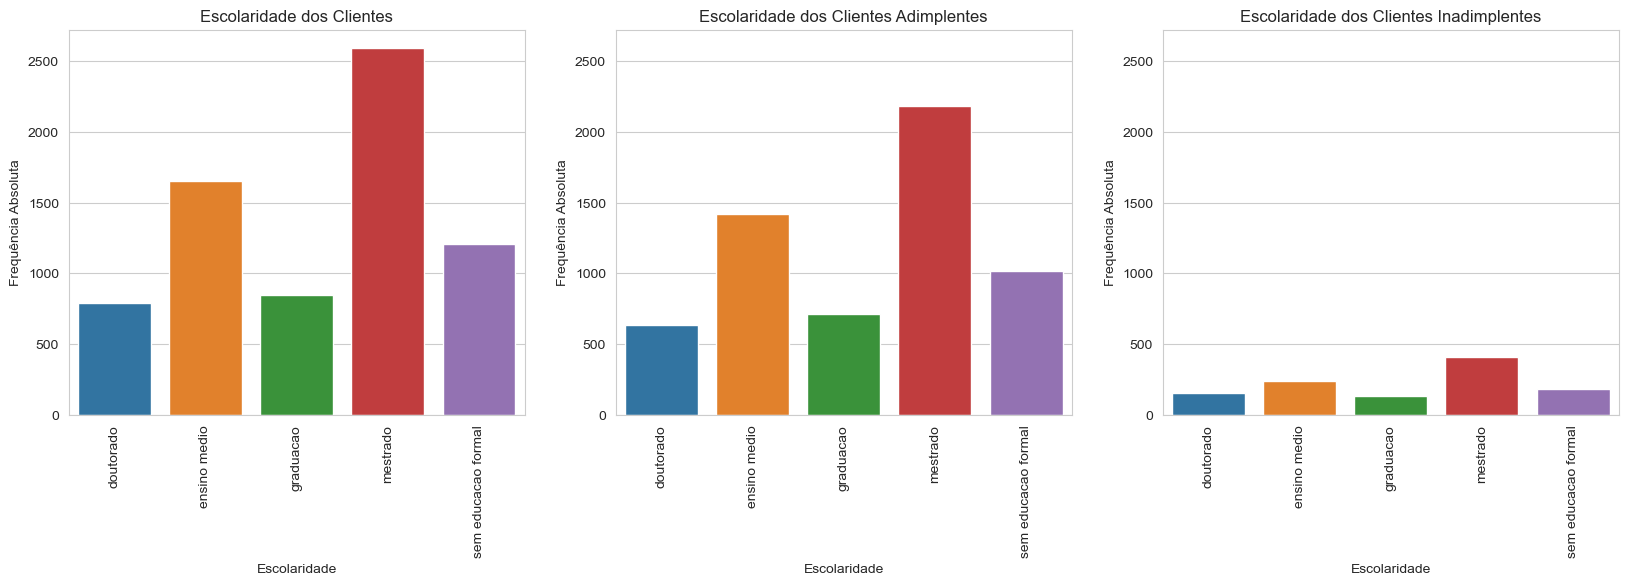

In [49]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

* Salário Anual

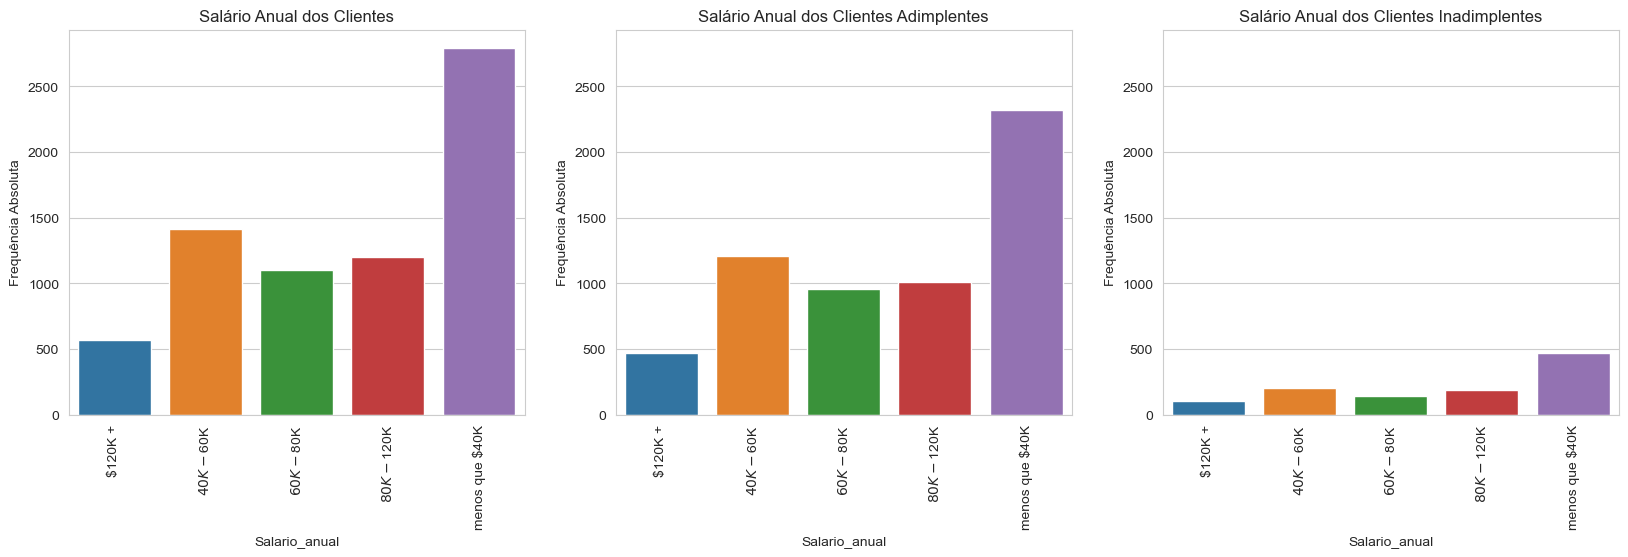

In [52]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

* Estado Civil

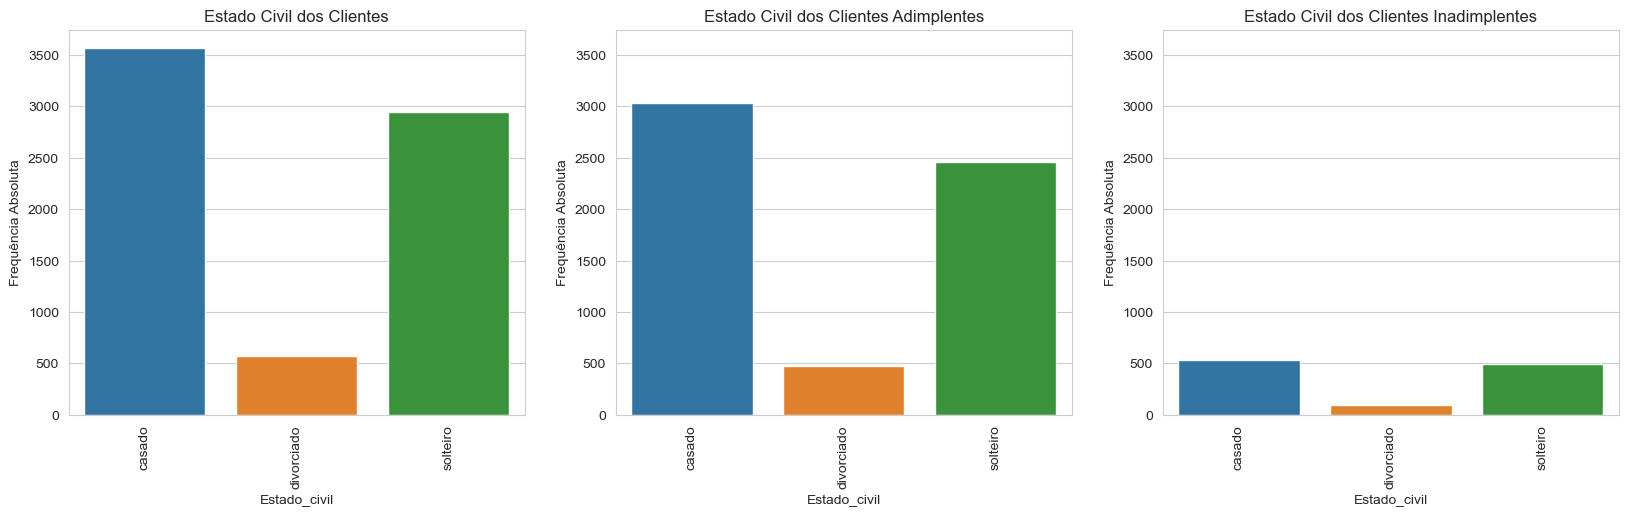

In [53]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

* Tipo de Cartão

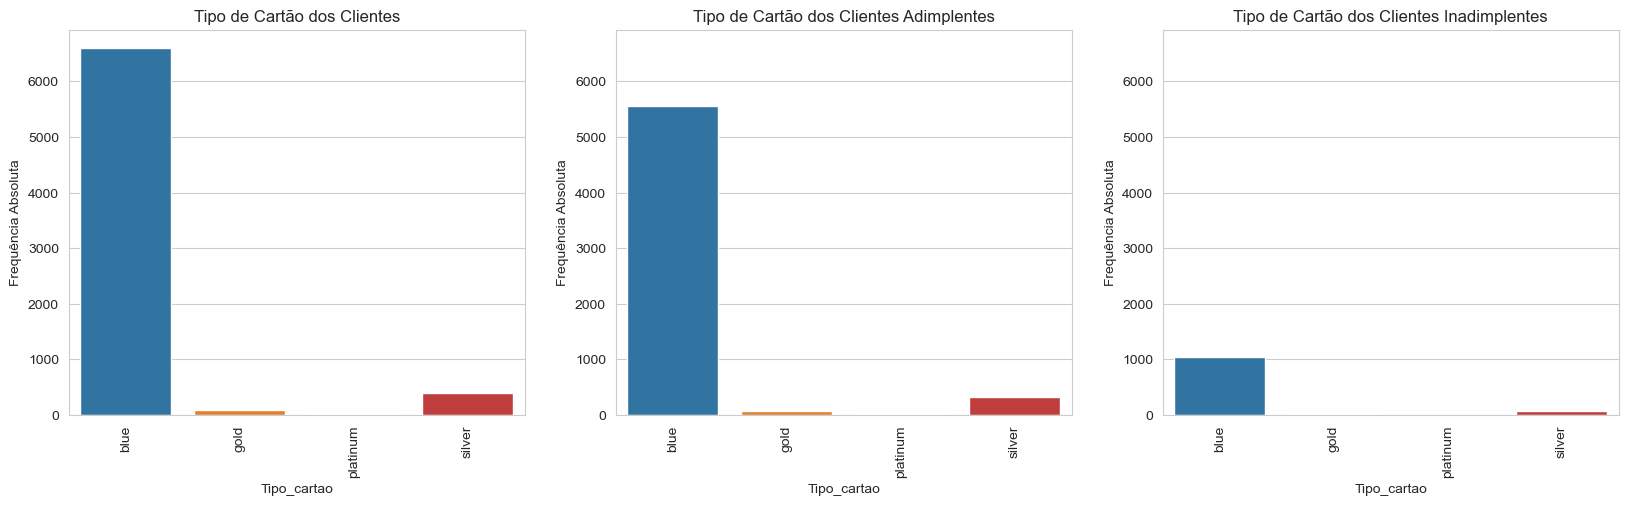

In [55]:
coluna = 'tipo_cartao'
titulos = ['Tipo de Cartão dos Clientes', 'Tipo de Cartão dos Clientes Adimplentes', 'Tipo de Cartão dos Clientes Inadimplentes']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
  eixo.set(ylim=(0, max_y))

plt.show()

Nesta seção criamos o código que irá tornar as colunas em gráficos. Para podermos comparar, criamos 3 grupos: um grupo completo, um para os **adimplentes (0)** e outro para os **inadimplentes (1)**.

Ao gerar a imagem comparamos os 3 gráficos buscando pontos em que deveriam divergir, indicando uma tendência maior em algum grupo para inadimplência ou adimplência.

Porém, em geral todos os gráficos se mantiveram nas mesmas proporções. Vale mencionar que não analisamos a variavel de *sexo* por questões de proteção, privacidade, equidade assegurados pela LGPD, além de ética profissional.

### Visualizando Variáveis Numéricas

*Quantidade de Transações nos Últimos 12 Meses

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\3045762736.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


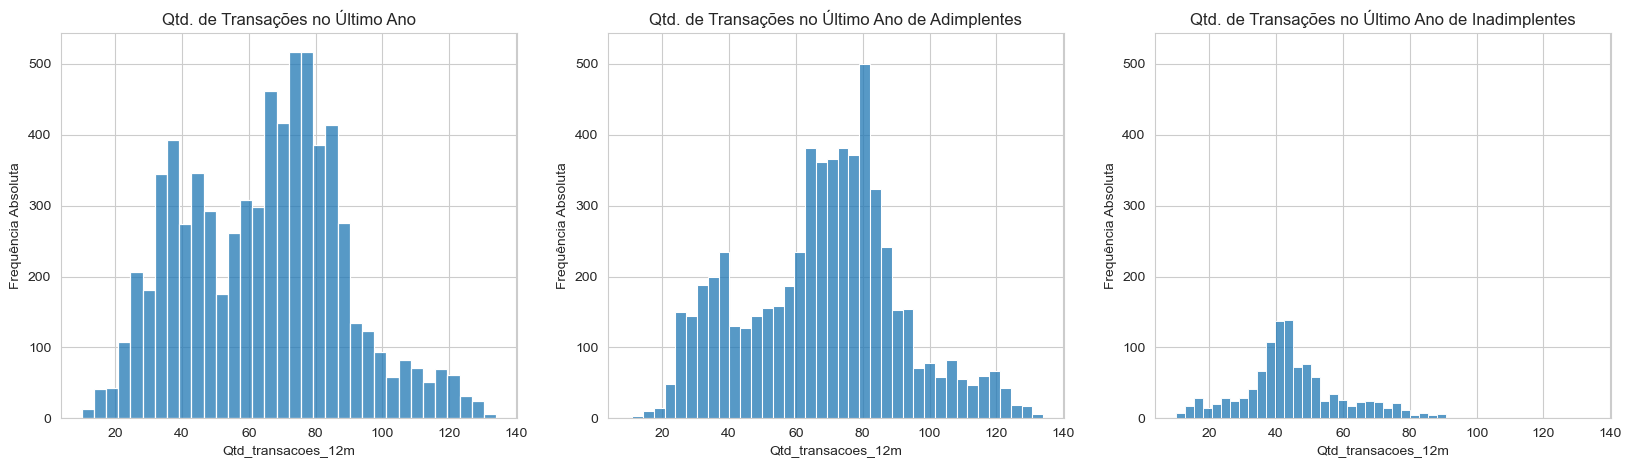

In [56]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

1.   Um alto volume de inadimplentes com cerca de 40 qtd_transacoes_12m




* Valor das Transações nos Últimos 12 Meses

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\3932491844.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


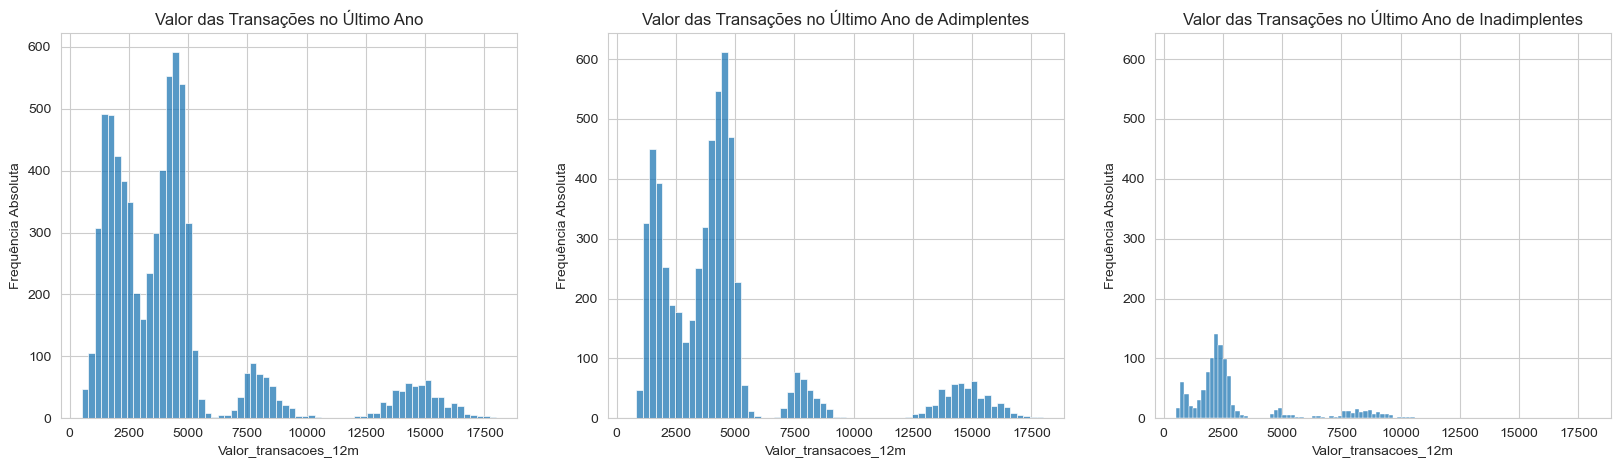

In [57]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

1.   Temos um alto índice de inadimplentes com valor_transacoes_12m abaixo e até 2500








* Limite de Crédito

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\2988152010.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


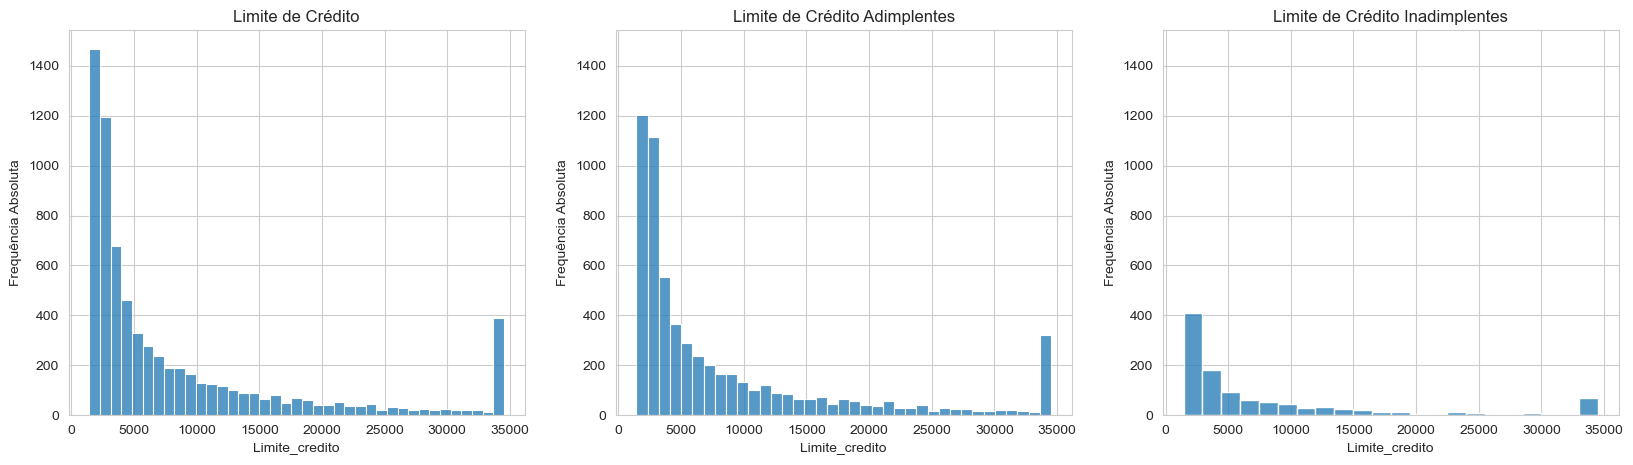

In [58]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito', 'Limite de Crédito Adimplentes', 'Limite de Crédito Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Existe uma parcela de quem tem limite abaixo de 5000, logo no primeiro terço, que tende a inadimplência.




* Meses Inativos nos Últimos 12 Meses

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\2457815017.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


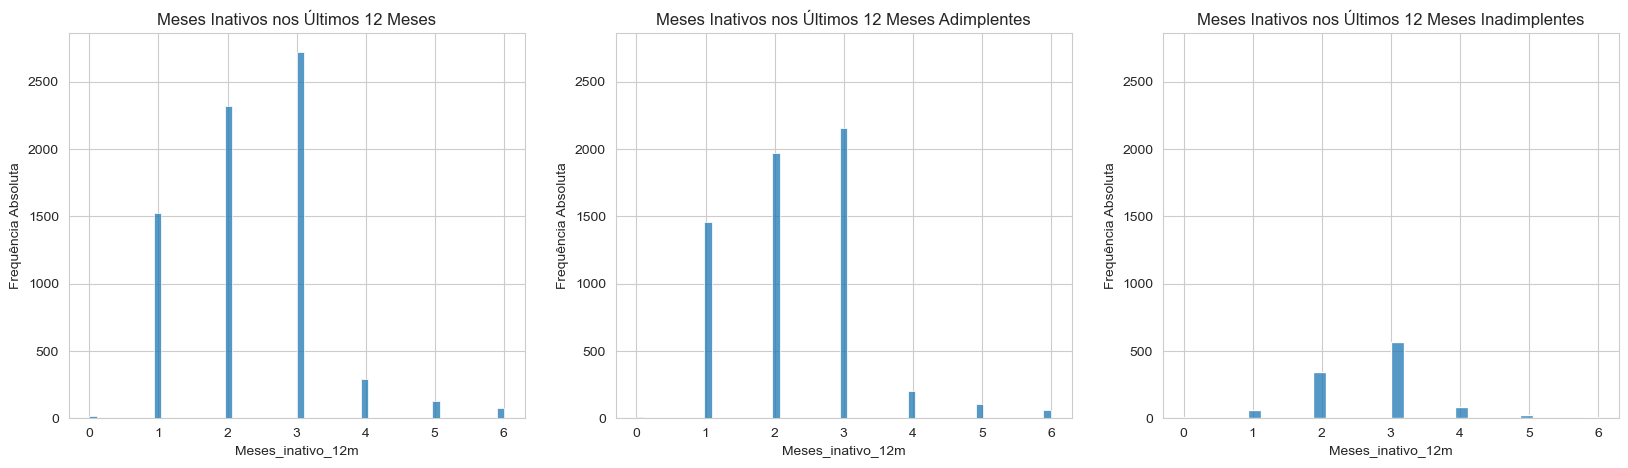

In [59]:
coluna = 'meses_inativo_12m'
titulos = ['Meses Inativos nos Últimos 12 Meses', 'Meses Inativos nos Últimos 12 Meses Adimplentes', 'Meses Inativos nos Últimos 12 Meses Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos notar uma crescente no risco de inadimplência do 1º mês de inatividade até o 3º, quando alcança o seu pico. Nada que seja divergente do esperado ao olhar para os demais grupos. *Porém e se cruzarmos essa informação com relação entre Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses*

* Interações nos Últimos 12 Meses

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\830186476.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


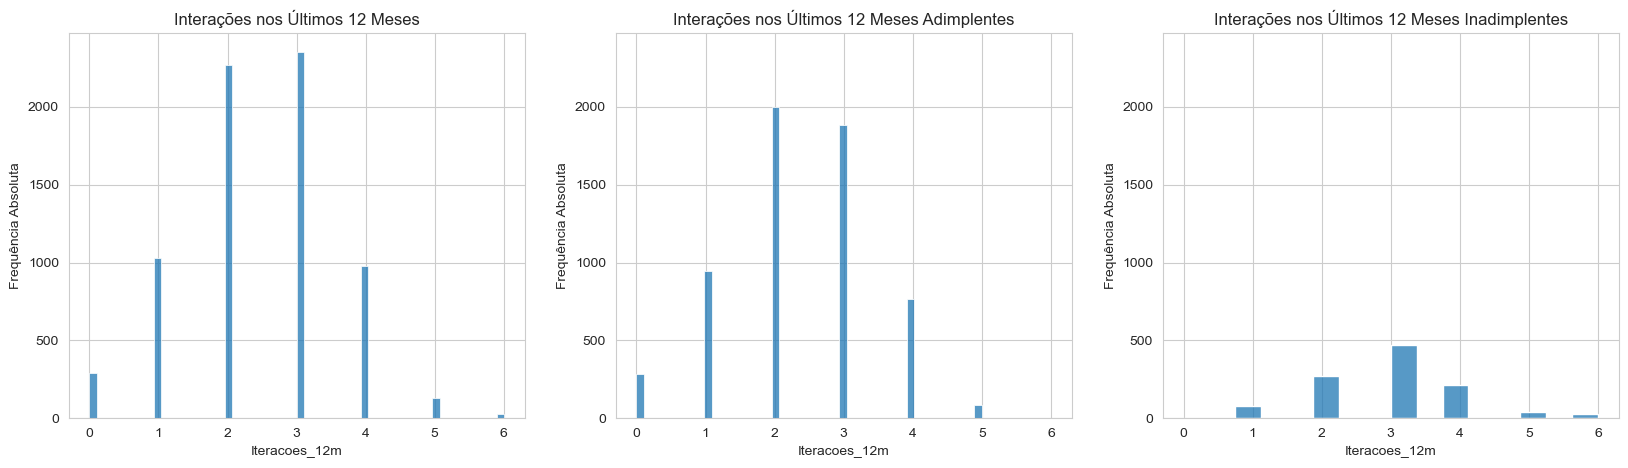

In [60]:
coluna = 'iteracoes_12m'
titulos = ['Interações nos Últimos 12 Meses', 'Interações nos Últimos 12 Meses Adimplentes', 'Interações nos Últimos 12 Meses Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Podemos notar uma mudança de comportamento entre o grupo padrão e de adimplentes com inadimplentes aqui. Podemos notar no grupo completo que 3 interações é o mais comum, porém 2 interações apenas é mais comum com os clientes adimplentes.

* Quantidade de Produtos

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\1102219386.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


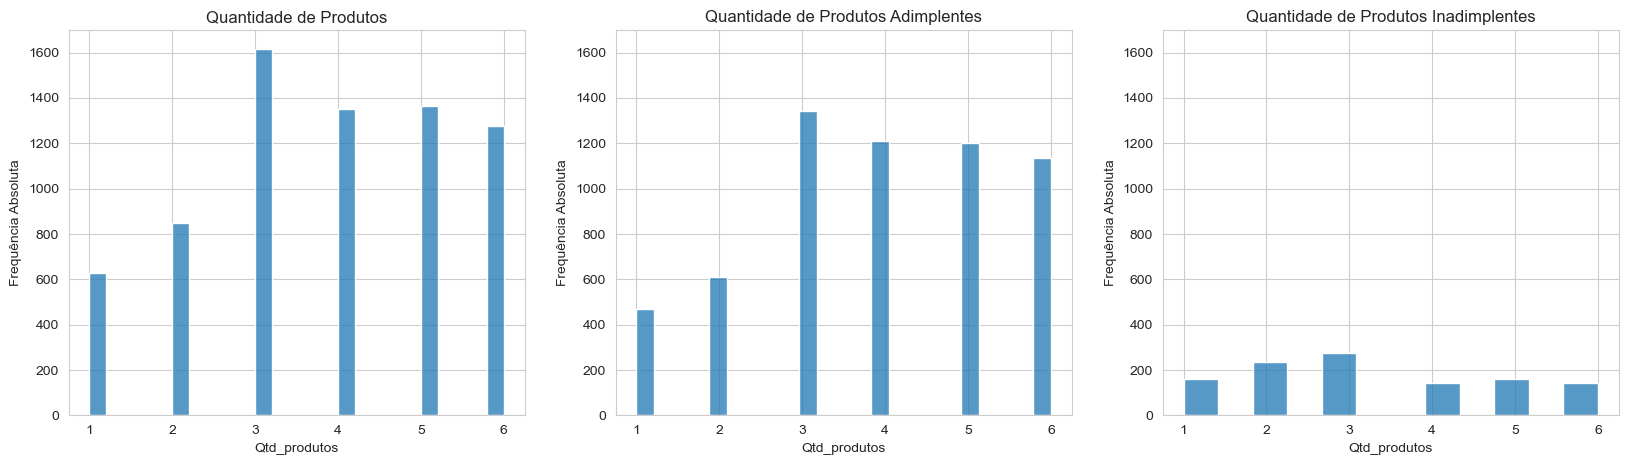

In [61]:
coluna = 'qtd_produtos'
titulos = ['Quantidade de Produtos', 'Quantidade de Produtos Adimplentes', 'Quantidade de Produtos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Meses de Relacionamento

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\1673290659.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


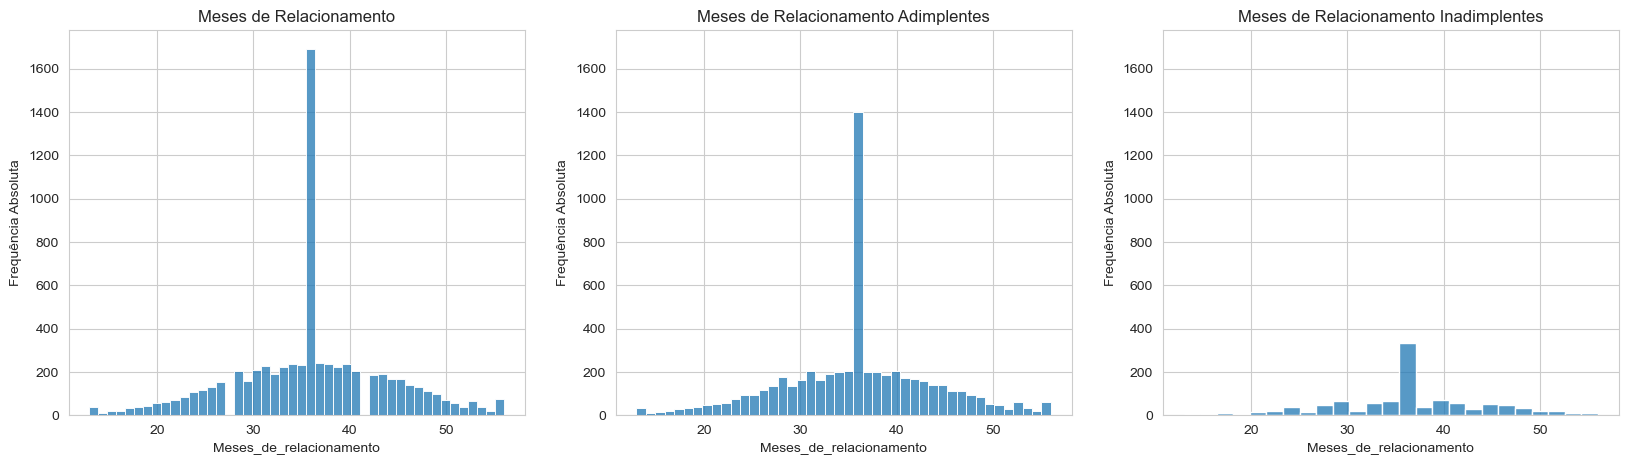

In [62]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de Relacionamento', 'Meses de Relacionamento Adimplentes', 'Meses de Relacionamento Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Dependentes

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\2265236485.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


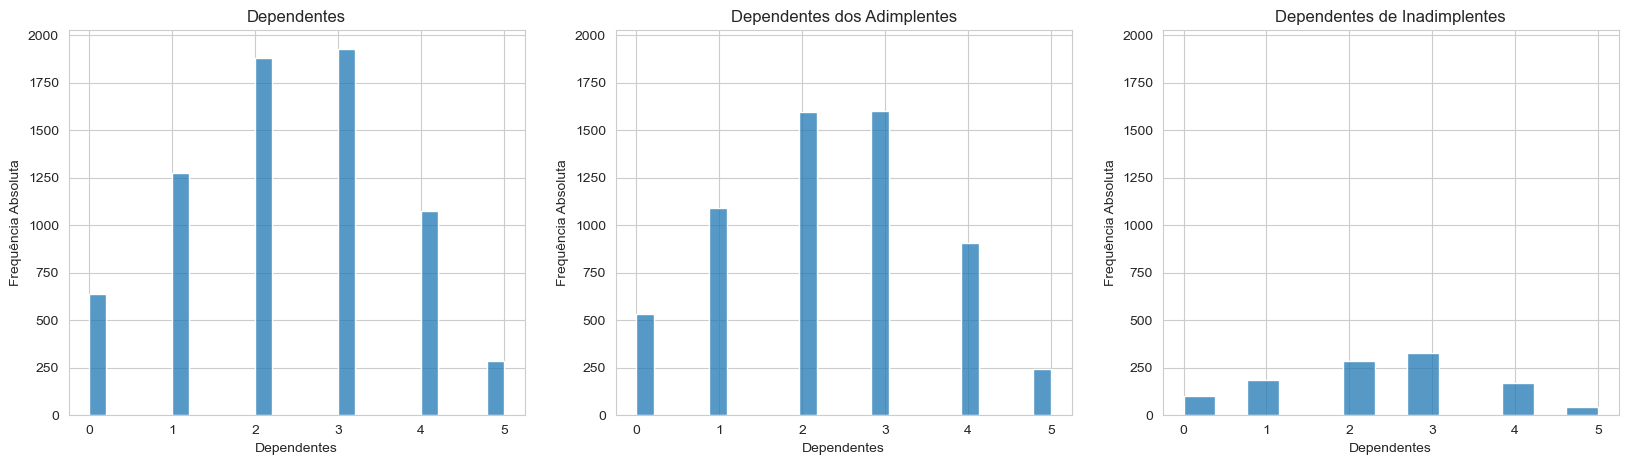

In [63]:
coluna = 'dependentes'
titulos = ['Dependentes', 'Dependentes dos Adimplentes', 'Dependentes de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Idade

C:\Users\Administrador\AppData\Local\Temp\ipykernel_5516\2917464569.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


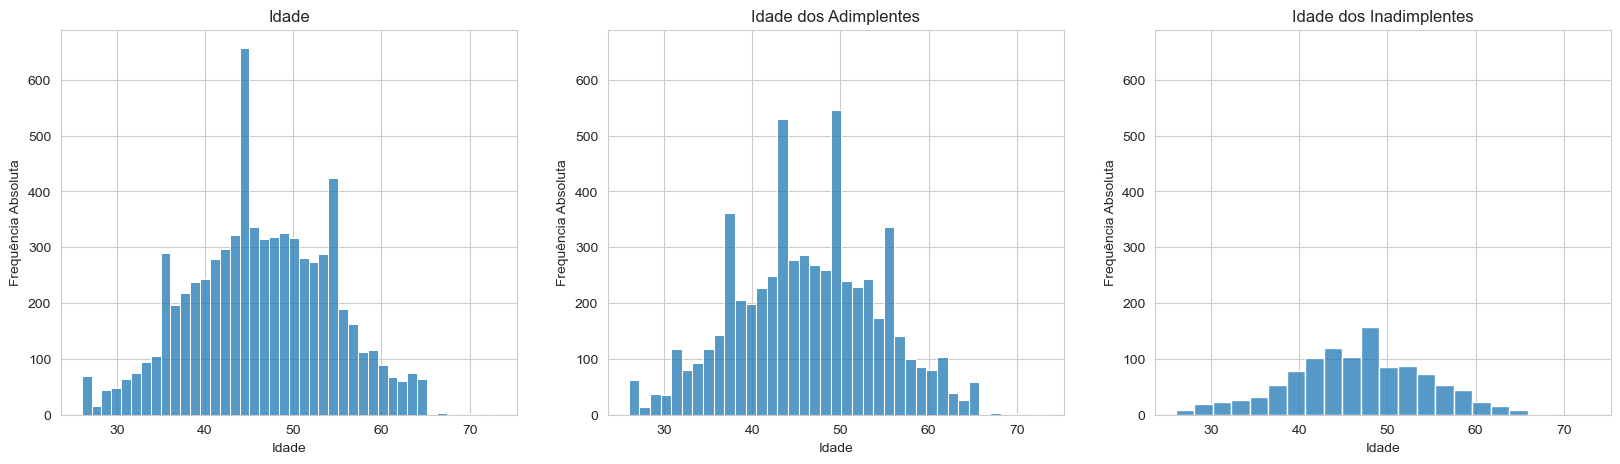

In [64]:
coluna = 'idade'
titulos = ['Idade', 'Idade dos Adimplentes', 'Idade dos Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

# Conclusões

Abaixo você pode conferir as conclusões que retirei das analises dos dados e um cruzamento de dados entre colunas. Como sempre, as explicações estão logo após o código

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


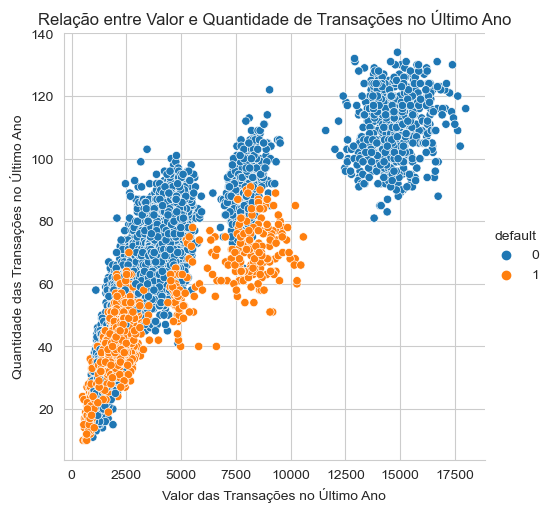

In [65]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

*   **Nicho de Adimplentes:**  clientes que fazem entre 80 e 100 transações ao ano com valores entre 2500 e 5000. Até bem perto dos 7500. 7500 em diantes começamos a entrar em default.

*   Entre os clientes que fazem menos que 2500 em 20 transações ao mês existem uma divisão mais ou menos igual, tendendo para a inadimplência. Observando o nicho acima, vemos que essa dificuldade em honrar as dívidas acaba se confirmando, salvo, algumas exceções. Interessante observar que a medida que a quantidade de transações aumenta, uma maneira de manter as contas em dia é estar com menores valores de transações. *podemos trabalhar em cima disso para criar um plano que guie o cliente em momento de dificuldade a organizar suas contas e manter as transferências em valores menores*



* Valor de Transações nos Últimos 12 Meses x Limite de Crédito

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


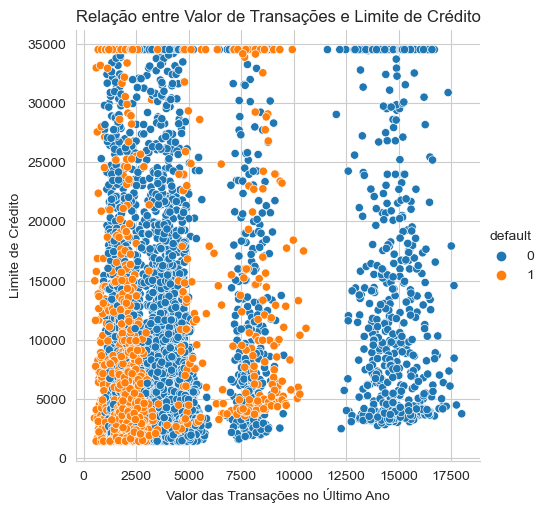

In [66]:
f = sns.relplot(x='valor_transacoes_12m', y='limite_credito', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor de Transações e Limite de Crédito',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Limite de Crédito'
  )

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


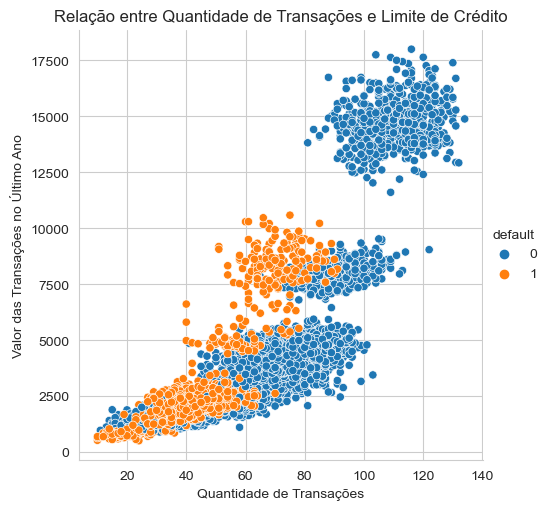

In [67]:
f = sns.relplot(x='qtd_transacoes_12m', y='valor_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Quantidade de Transações e Limite de Crédito',
    xlabel='Quantidade de Transações',
    ylabel='Valor das Transações no Último Ano'
  )

1.   Como é esperado, existe uma relação entre inadimplência e valor das transações. Podemos ver que os clientes inadimplentes se agrupam com valor de transações abaixo de 12500.

2.   Também podemos ver que neste nicho (valor de transações > 12500) a taxa de inadimplência é maior com limite de crédito abaixo de 5000, especialmente concentrado próximo ao valor de 2500.

3.    Relacionando o valor das transferências a quantidade de transações, notamos que clientes adimplentes costumam fazer mais transações, mesmo que o valor das transações se mantenha abaixo de 2500. De certa forma, parece que quanto maior a quantidade de transações, mais ele tende a adimplência.






C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


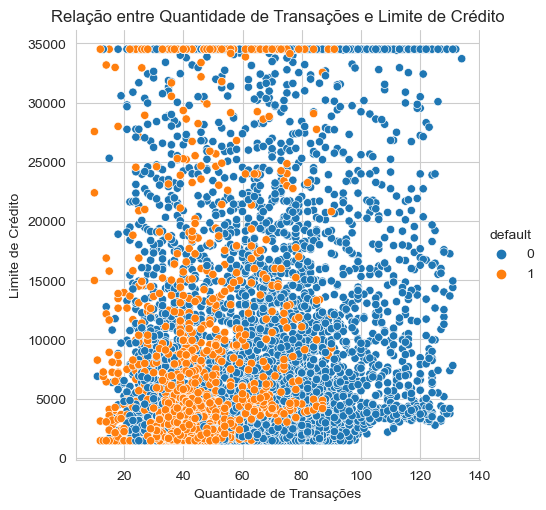

In [68]:
f = sns.relplot(x='qtd_transacoes_12m', y='limite_credito', data=df, hue='default')
_ = f.set(
    title='Relação entre Quantidade de Transações e Limite de Crédito',
    xlabel='Quantidade de Transações',
    ylabel='Limite de Crédito'
  )

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


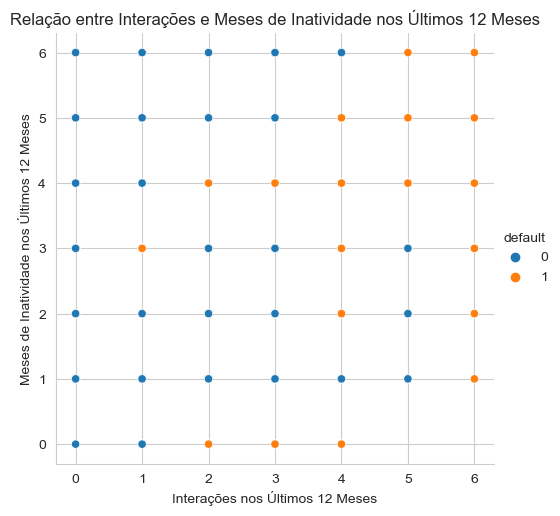

In [69]:
f = sns.relplot(x='iteracoes_12m', y='meses_inativo_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Interações e Meses de Inatividade nos Últimos 12 Meses',
    xlabel='Interações nos Últimos 12 Meses',
    ylabel='Meses de Inatividade nos Últimos 12 Meses'
  )

*   Quanto mais interação temos com o cliente, maior é a taxa de inadimplência. De certa forma, isso também indica que nós entramos em pouco contato com o cliente, geralmente apenas no momento da inadimplência.

*   Parece que há uma virada de *default* entre 3 e 4 meses. Com 3 meses de inatividade o banco geralmente entra em contato e partir daí o cliente temos várias interações com clientes inadimplentes.



C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


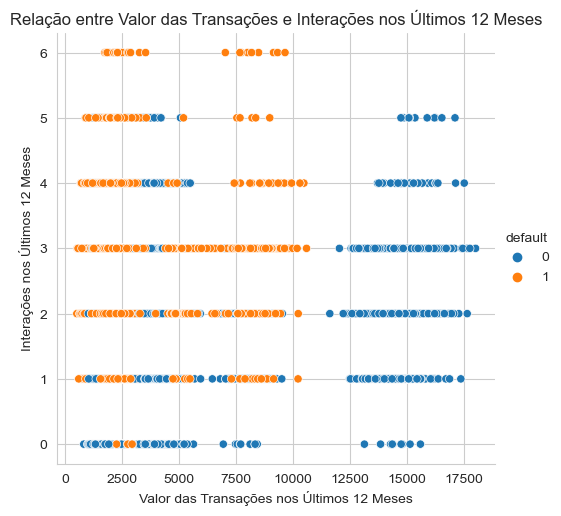

In [70]:
f = sns.relplot(x='valor_transacoes_12m', y='iteracoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor das Transações e Interações nos Últimos 12 Meses',
    xlabel='Valor das Transações nos Últimos 12 Meses',
    ylabel='Interações nos Últimos 12 Meses'
  )

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


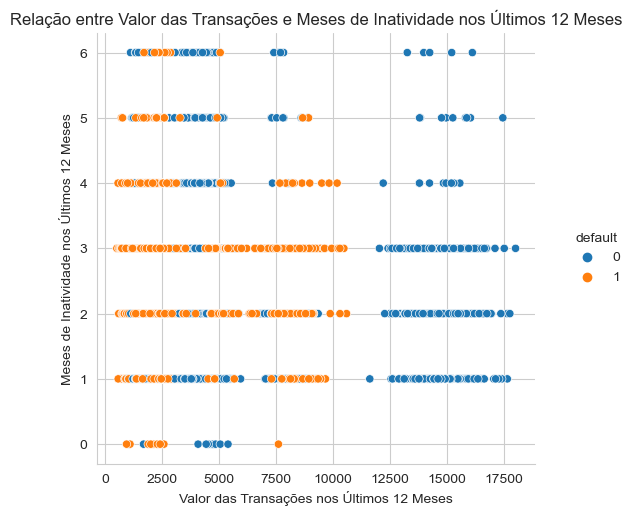

In [71]:
f = sns.relplot(x='valor_transacoes_12m', y='meses_inativo_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor das Transações e Meses de Inatividade nos Últimos 12 Meses',
    xlabel='Valor das Transações nos Últimos 12 Meses',
    ylabel='Meses de Inatividade nos Últimos 12 Meses'
  )

C:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


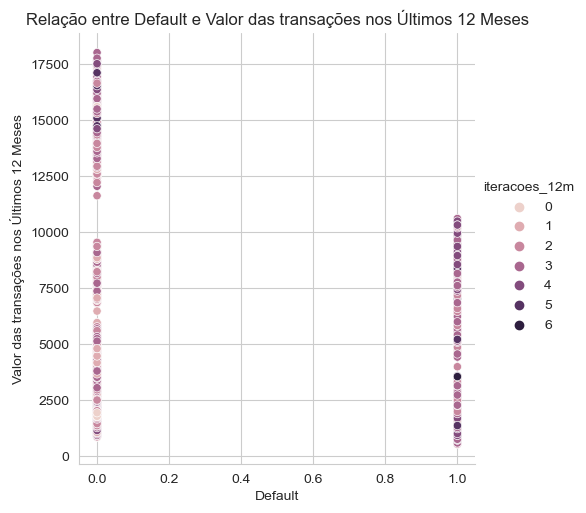

In [72]:
f = sns.relplot(x='default', y='valor_transacoes_12m', data=df, hue='iteracoes_12m')
_ = f.set(
    title='Relação entre Default e Valor das transações nos Últimos 12 Meses',
    xlabel='Default',
    ylabel='Valor das transações nos Últimos 12 Meses'
  )

Podemos notar que interagimos pouco com clientes adimplentes, especialmente com menores valores de transação.

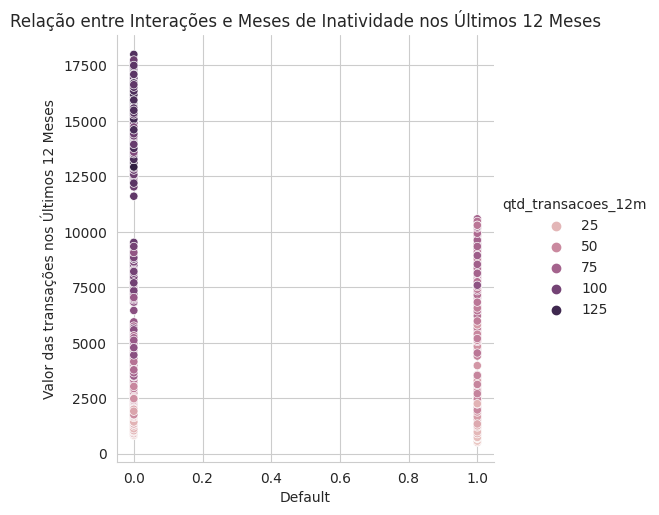

In [ ]:
f = sns.relplot(x='default', y='valor_transacoes_12m', data=df, hue='qtd_transacoes_12m')
_ = f.set(
    title='Relação entre Interações e Meses de Inatividade nos Últimos 12 Meses',
    xlabel='Default',
    ylabel='Valor das transações nos Últimos 12 Meses'
  )

Podemos notar que a medida que valor das transações aumenta, os adimplentes também aumentam a quantidade de transações para o mesmo valor. Já os inadimplentes fazem menos transações, mas totalizando o mesmo valor total.

### Insight Final

Ao fim dessas etapas pude traçar um perfil para o cliente inadimplente:

- Ele realiza menos de 100 transações ao ano e o valor dessas transações fica abaixo de R$10.000.
- Neste grupo, clientes com menos de 60 transações e valor abaixo de 2500 aparentemente possuem ainda mais chances de se tornarem inadimplentes.
- Também podemos notar que a medida que a quantidade de transações aumenta, a inadimplência diminui. A mesma relação existe ao aumentar o valor das transações, mas vale considerar que neste caso isso só é válido para um nicho isolado com valores de transações muito altos.
- O cliente passa por meses de inatividade antes de se tornar inadimplente
- Uma vez que o cliente está inadimplente, a comunicação da instituição com ele aumenta. De certa forma isso é algo esperado, já que a partir deste momento iniciam-se as cobranças.

Porém, ao analisarmos os grupos com valores de transações abaixo de 2500 podemos notar que existem alguns adimplentes e estes possuem um comportamente comum: realizar mais transações. Pensando nisso, podemos entender que aqueles que utilizam o cartão de crédito com mais frequência, possivelmente centralizando seus gastos, sabem gerir melhor estas transações. E aqueles que realizam menos transações podem acabar se endividando por um uso impulsivo em compras mais caras.

Pensando em como a instituição aumenta seu contato com os clientes inadimplentes (por motivos óbvios), podemos analisar as interações com os clientes e ver que alguns clientes com se tornaram inadimplentes em 3 meses de inatividade, mas bastou 1 interação da empresa para que eles honrassem seu compromisso.

Assim, uma solução viável para a instuição de crédito pode ser: fornecer conteúdos de educação financeira, informando os clientes da existência destes conteúdos, levando os clientes a adotarem um uso mais consciente do cartão. Esse "uso consciente" significa evitar grandes compras, migrando para uma centrlização de gastos no cartão que levaria a mais transações de valores menores. Ao mesmo tempo, manter um acompanhamento com os clientes no grupo de risco, entrando em contato a partir do 2º mês de inatividade ou quando grandes operações forem feitas em seu cartão.